In [1]:
import permutationTest as pt
import numpy as np

### Get synthetic data

In [ ]:
path = "figures/memoryAllocation"

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
def preparePandas(timeData, sampleSizes, name):
    """Create DF for sns-plots"""
    preparePd = list()
    for time, sample in zip(timeData, sampleSizes):
        preparePd.append([str(name),time, sample])
        
            
    return preparePd

def timePlotSNS(TimeList_list, NameList, sampleShape, y_label , x_label ,log=False, path=None):
    """Create SNS timeseries-plot"""
    a4_dims = (11.7/1.5, 8.27/1.5)
    fig, ax = plt.subplots(figsize=a4_dims)
    

    
    sns.set(style="white")
    sns.set_context("talk")
    
    for i, (time_list, name) in enumerate(zip(TimeList_list, NameList)):
        if log:
            df = preparePandas(np.log10(time_list), sampleShape, name)
        else:
            df = preparePandas(time_list, sampleShape, name)
            
        if i ==0:
            data = df
        else:
            data += df
            
    pdData = pd.DataFrame(data, columns=['Method', y_label,'bins'])
    

    if log:        
        MAX = max(pdData[y_label])
        MIN = min(pdData[y_label])

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData,)
    

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

In [69]:
N = list(range(10,150,10))
bins = [10,20,30]
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [70]:
def memoryAllocation_N(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemNList = list()
    for b in bins:
        memList = list()
        for n in N:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(pt.GreenFloatCuda_memcheck(A,B, b))
        
        allMemNList.append(memList)
    
    return allMemNList

In [71]:
allMemNList = memoryAllocation_N(variables, data_generator)

In [72]:
namesList= [r"$n_{w}=10$", r"$n_{w}=20$", r"$n_{w}=30$"]

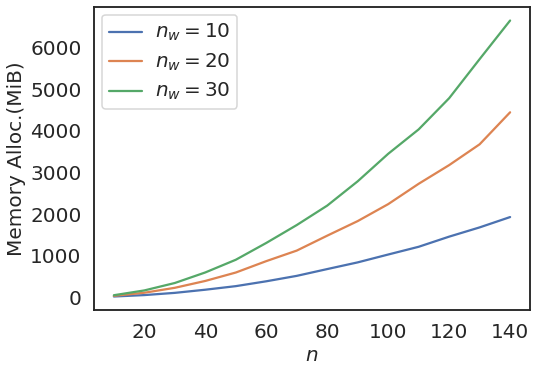

In [73]:
timePlotSNS(allMemNList,namesList,N, "Memory Alloc.(MiB)",r"$n$", path="./figures/experiemnt4/MemAlloc_N")

In [74]:
N = [100, 120, 140]
bins = list(range(10,30,2))
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [75]:
def memoryAllocation_Bins(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemSList = list()
    for n in N:
        memList = list()
        for b in bins:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(pt.GreenFloatCuda_memcheck(A,B, b))
        
        allMemSList.append(memList)
    return allMemSList
        

In [76]:
allMemSList = memoryAllocation_Bins(variables, data_generator)

In [77]:
nameList = [r"$n=100$", r"$n=120$", r"$n=140$"]

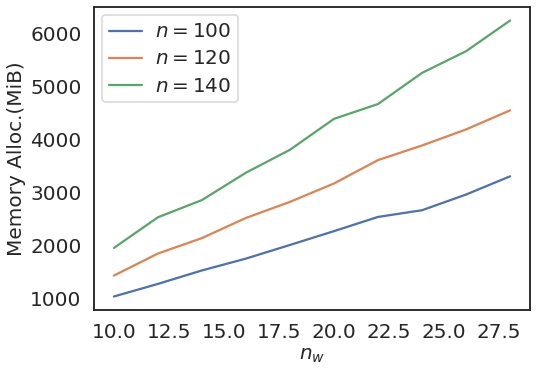

In [78]:
timePlotSNS(allMemSList,nameList,bins, "Memory Alloc.(MiB)",r"$n_{w}$", path="./figures/experiemnt4/MemAlloc_Bins")